### Produkt Classification

#### Ausgangslage
Wir haben von der Firma Biral den Auftrag erhalten die Produkte (Pumpen im Bereich Heizung, Kälte und Brauchwasser) automatisch anhand ihrer Merkmale zu kategorisieren. Es gibt drei Kategorien RED (Heizung), GREEN (Klima) und BLUE (Brauchwasser), die bestehenden Daten sind bereits einer Kategorie zugewiesen.

#### Aufgabe
Die Pumpen der Firma Biral anhand ihrer Merkmalen mittels Supervised Learning Algorithmen einer der oben genannten Kategorien zuweisen. Testen von verschiedenen Algorithmen und anhand der Metriken miteinander vergleichen.

In [ ]:
# Upgrade von pandas ausführen und dann unter Kernel den Link Restart klicken.
!pip install pandas --upgrade

In [1]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Helper Methode für die Ausgabe der Metriken

In [2]:
def plot_report(classifier_name, x, y, clf_model, clf_prediction):
    print(classifier_name + ":")
    print("Test Score: {:.3%}\n".format(clf_model.score(x, y)))
    print(classification_report(y, clf_pred))

#### Helper Methode für die Confusion Matrix

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Laden der Produkt Daten
Die Daten werden aus dem CSV in ein Pandas DataFrame geladen. Das Dataset hat 222 Rows und 19 Features

In [3]:
csv = pd.read_csv("Biral_Products_csv.csv", delimiter=",", header=0)
print(csv.shape)

(222, 19)


#### Ausgabe der Verteilung der verschiedenen Features

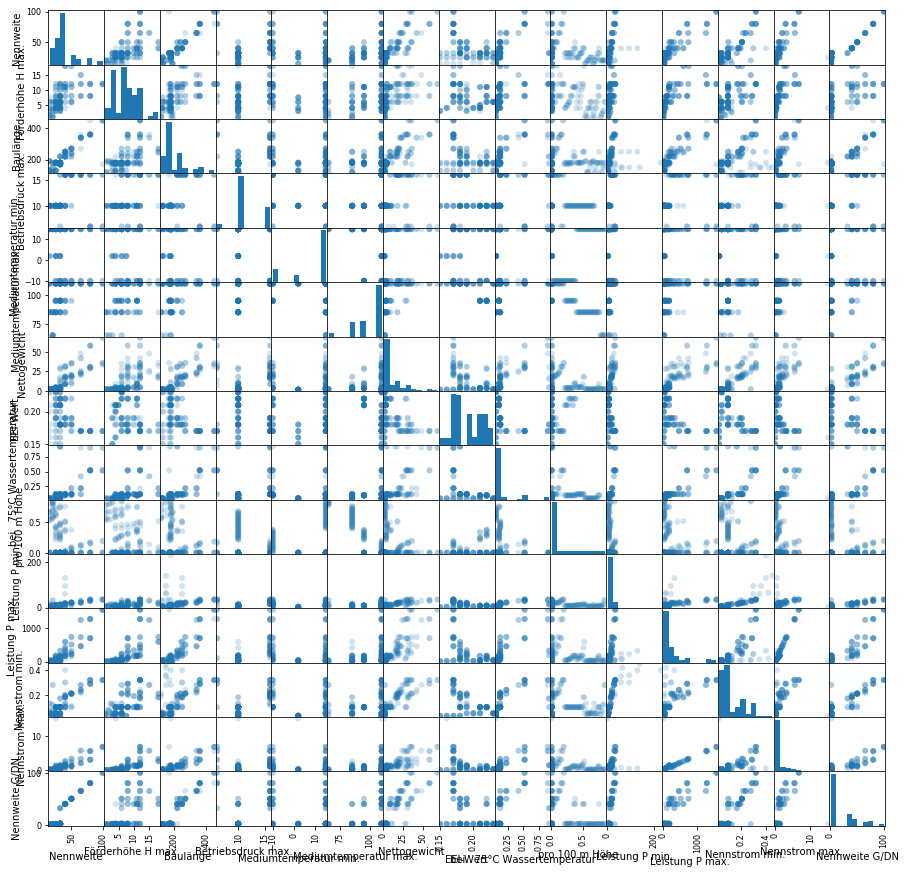

In [4]:
pd.plotting.scatter_matrix(csv, figsize=(15, 15), marker="o", alpha=.2)
plt.show()

#### Gruppenbezeichnug extrahieren und Textfeatures entfernen

In [5]:
labels = csv.Gruppenbezeichnung
csv.drop(columns=["Bezeichnung", "Gruppenbezeichnung", "Beschreibung", "Anwendungsgebiet"], inplace=True)
print(csv.shape)

(222, 15)


#### Umwandlung in ein numpy Array

In [6]:
data = np.array(csv)
print(data.shape)

(222, 15)


#### Missing Values mit most frequent ersetzen

In [7]:
imputer_scaler = Imputer(missing_values="NaN", strategy="most_frequent", verbose=1)
data = imputer_scaler.fit_transform(data)
print(data.shape)

(222, 15)


#### Daten in Test und Train aufteilen

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33)

#### Classifier Vergleich
Folgende Classifier sollten miteinander verglichen werden. Die benötigten Imports sind bereits vorhanden.
* Naive Bayes http://scikit-learn.org/stable/modules/naive_bayes.html
* KNN http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
* Decision Tree http://scikit-learn.org/stable/modules/tree.html#classification
* Linear Support Vector Machine http://scikit-learn.org/stable/modules/svm.html

Der Classification Report kann folgendermassen ausgegeben werden

```python
plot_report("Naive Bayes", X_test, y_test, model, prediction)
```

Naive Bayes:
Test Score: 82.432%

             precision    recall  f1-score   support

       BLUE       0.54      1.00      0.70        14
      GREEN       0.95      1.00      0.97        19
        RED       1.00      0.68      0.81        41

avg / total       0.90      0.82      0.83        74

Confusion matrix, without normalization
[[14  0  0]
 [ 0 19  0]
 [12  1 28]]


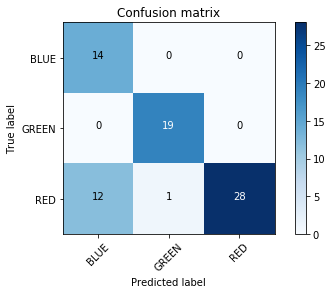

KNN:
Test Score: 67.568%

             precision    recall  f1-score   support

       BLUE       0.67      0.71      0.69        14
      GREEN       0.62      0.26      0.37        19
        RED       0.69      0.85      0.76        41

avg / total       0.67      0.68      0.65        74

Confusion matrix, without normalization
[[10  0  4]
 [ 2  5 12]
 [ 3  3 35]]


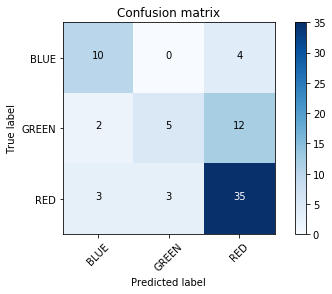

Random Forest:
Test Score: 95.946%

             precision    recall  f1-score   support

       BLUE       1.00      0.86      0.92        14
      GREEN       1.00      0.95      0.97        19
        RED       0.93      1.00      0.96        41

avg / total       0.96      0.96      0.96        74

Confusion matrix, without normalization
[[12  0  2]
 [ 0 18  1]
 [ 0  0 41]]


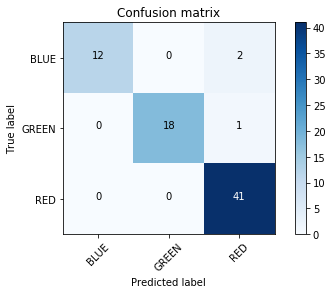

Decision Tree:
Test Score: 98.649%

             precision    recall  f1-score   support

       BLUE       1.00      1.00      1.00        14
      GREEN       1.00      0.95      0.97        19
        RED       0.98      1.00      0.99        41

avg / total       0.99      0.99      0.99        74

Confusion matrix, without normalization
[[14  0  0]
 [ 0 18  1]
 [ 0  0 41]]


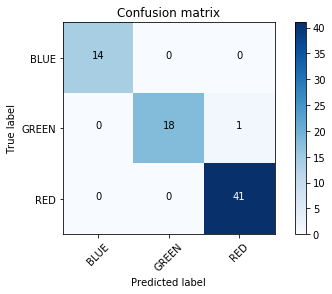

Linear SVM:
Test Score: 97.297%

             precision    recall  f1-score   support

       BLUE       1.00      1.00      1.00        14
      GREEN       0.90      1.00      0.95        19
        RED       1.00      0.95      0.97        41

avg / total       0.98      0.97      0.97        74

Confusion matrix, without normalization
[[14  0  0]
 [ 0 19  0]
 [ 0  2 39]]


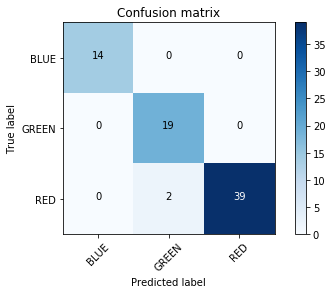

RBF SVM:
Test Score: 62.162%

             precision    recall  f1-score   support

       BLUE       1.00      0.29      0.44        14
      GREEN       1.00      0.05      0.10        19
        RED       0.59      1.00      0.75        41

avg / total       0.78      0.62      0.52        74

Confusion matrix, without normalization
[[ 4  0 10]
 [ 0  1 18]
 [ 0  0 41]]


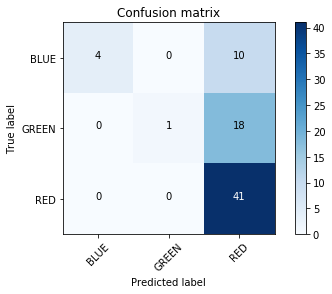

In [12]:
names = ["Naive Bayes",
         "KNN",
         "Random Forest",
         "Decision Tree",
         "Linear SVM",
         "RBF SVM"]

classifiers = [GaussianNB(),
               KNeighborsClassifier(n_neighbors=3),
               RandomForestClassifier(random_state=0, max_depth=3),
               DecisionTreeClassifier(max_depth=3),
               SVC(kernel="linear", C=0.025),
               SVC(gamma=2, C=1)]

for name, clf in zip(names, classifiers):
    clf_model = clf.fit(X_train, y_train)
    clf_pred = clf.predict(X_test)
    plot_report(name, X_test, y_test, clf_model, clf_pred)
    
    cnf_matrix = confusion_matrix(y_test, clf_pred)
    plt.figure()
    plot_confusion_matrix(cnf_matrix, np.unique(labels))
    plt.show()